# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [Stanford movie review corpus](https://nlp.stanford.edu/sentiment/) corpus.  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see this example's [online documentation](https://plandes.github.io/deepnlp/doc/movie-example.html) file for more information.  Jupyter should be started from the `example/movie` directory.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# environemnt configuration and set up: add this (deepnlp) library to the Python path and framework entry point
class NotebookHarness(object):
    """Configure the Jupyter notebook environment and create model resources."""
    def __init__(self, app_root_dir: str = '..', deepnlp_path: str = '../../../src/python'):
        """Set up the interpreter environment so we can import local packages.
        
        :param app_root_dir: the application root directory
        :param deepnlp_path: the path to the DeepNLP source code
        """
        import sys
        from pathlib import Path
        self.app_root_dir = Path(app_root_dir)
        # add the example to the Python library path
        sys.path.append(str(self.app_root_dir / 'src'))
        # add the deepnlp path
        sys.path.append(deepnlp_path)
        from zensols.deeplearn import TorchConfig
        # reset random state for consistency before any other packages are imported
        TorchConfig.init()

    def __call__(self, cuda_device_index: int = None, temporary_dir_name: str = None):
        """Create and return an instance a :class:`.JupyterManager`.
        
        :param cuda_device_index: the CUDA (GPU) device to use
        :param temporary_dir_name: the temporary directory to use for temporary space and results
        """
        from zensols.deeplearn.cli import JupyterManager
        from movie import CliFactory
        factory_args = {'root_dir': self.app_root_dir}
        if temporary_dir_name is not None:
            factory_args['temporary_dir'] = self.app_root_dir / temporary_dir_name
        mng = JupyterManager(
            allocation_tracking='counts',
            cli_class=CliFactory,
            factory_args=factory_args,
            cli_args_fn=lambda model: ['-c', str(self.app_root_dir / 'models' / f'{model}.conf')])
        if cuda_device_index is not None:
            # tell which GPU to use
            mng.config('gpu_torch_config', cuda_device_index=cuda_device_index)
        return mng


harness = NotebookHarness()
mng = harness()

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [2]:
from io import StringIO
facade = mng.create_facade('glove50')
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade.write()

executor:
  model: Review: glove_50 
  feature splits:
    split stash splits:
        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58
    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 2
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'glove_50_embedding', 'dependencies', 'label', 'enums'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

In [3]:
facade.epochs = 2
mng.run(display_results=False)

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 3s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
tr:162.756|va min:122.400|va:119.639|lr:0.001 \/: 100%|███████████████████████████████████| 2/2 [00:01<00:00,  1.04it/s]zensols.deeplearn.model.executor.s

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 75 epochs using learning rate 0.001
tr:101.975|va min:90.744|va:91.620|lr:0.001 /\: 100%|███████████████████████████████████| 75/75 [01:37<00:00,  1.15it/s]zensols.deeplearn.model.executor.status: epoch threshold reached at 75
zensols.deeplearn.model.executor.status: final minimum validation loss: 90.74378496408463, 54 decreases
zensols.deeplearn.model.executor.status: executed train in 1 minute, 38s
zensols.deeplearn.model.executor.status: deallocating 0 batches
zensols.deeplearn.model.facade: trained in 1 

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:45:55:002746
    ended: 06/30/2021 10:47:32:863500
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 75/75
    min/ave/max loss: 19.30069/101.97463/132.72618
    accuracy: 0.738 (5970/8086)
    micro: F1: 0.738, precision: 0.738, recall: 0.738
    macro: F1: 0.738, precision: 0.739, recall: 0.738
    weighted: F1: 0.738, precision: 0.739, recall: 0.738
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 70/75
    min/ave/max loss: 11.10054/90.74378/129.10985
    accuracy: 0.756 (778/1029)
    micro: F1: 0.756, precision: 0.756, recall: 0.756
    macro: F1: 0.755, precision: 0.762, recall: 0.756
    weighted: F1: 0.755, precision: 0.762, recall: 0.756
  test:
    started: 06/30/2021 10:47:33:591156
    ended: 06/30/2021 10:47:33:632076
    batches: 11
    ave data points per batch/total: 190.8/2099
    converg

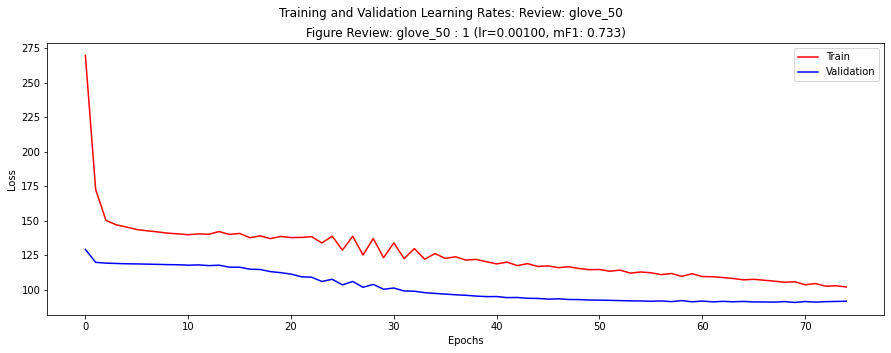

In [4]:
facade.epochs = 75
mng.run()

zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 56s
zensols.deepnlp.embed.word2vec: loaded word2vec model in 56s
zensols.deepnlp.embed.word2vec: created data structures in 12s
zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: True, device: cuda:0
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deepnlp.embed.word2vec: reading binary vector file
zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 55s
zensols.deepnlp.embed

Name: Review: glove_50 : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:50:10:347379
    ended: 06/30/2021 10:51:26:689294
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 73/75
    min/ave/max loss: 12.78058/67.79117/93.02733
    accuracy: 0.852 (6886/8086)
    micro: F1: 0.852, precision: 0.852, recall: 0.852
    macro: F1: 0.851, precision: 0.853, recall: 0.852
    weighted: F1: 0.851, precision: 0.853, recall: 0.852
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 41/75
    min/ave/max loss: 9.40753/84.01313/114.84851
    accuracy: 0.759 (781/1029)
    micro: F1: 0.759, precision: 0.759, recall: 0.759
    macro: F1: 0.759, precision: 0.761, recall: 0.759
    weighted: F1: 0.758, precision: 0.762, recall: 0.759
  test:
    started: 06/30/2021 10:51:31:670831
    ended: 06/30/2021 10:51:31:711795
    batches: 11
    ave data points per batch/total: 190.8/2099
    converged/

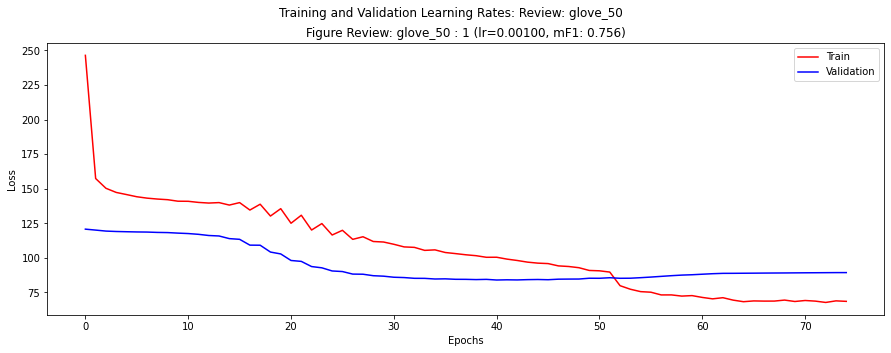

In [5]:
# changing the embedding updates the model, but currently results show initial loaded embeddings (glove50)
facade.embedding = 'word2vec_300_embedding'
mng.run()
# persist the plot and results to the file system (commented out to keep results only in notepad)
#facade.persist_result()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 9s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:75.982|va min:78.703|va:89.212|lr:0.001 /\: 100%|████████████████████████████████████| 35/35 [00

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:51:46:484386
    ended: 06/30/2021 10:52:28:904698
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    min/ave/max loss: 9.24998/75.98219/120.73730
    accuracy: 0.831 (6716/8086)
    micro: F1: 0.831, precision: 0.831, recall: 0.831
    macro: F1: 0.830, precision: 0.836, recall: 0.831
    weighted: F1: 0.830, precision: 0.837, recall: 0.831
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 28/35
    min/ave/max loss: 8.07112/78.70281/133.42510
    accuracy: 0.804 (827/1029)
    micro: F1: 0.804, precision: 0.804, recall: 0.804
    macro: F1: 0.801, precision: 0.821, recall: 0.804
    weighted: F1: 0.801, precision: 0.821, recall: 0.804
  test:
    started: 06/30/2021 10:52:31:318540
    ended: 06/30/2021 10:52:31:364630
    batches: 11
    ave data points per batch/total: 190.8/2099
    c

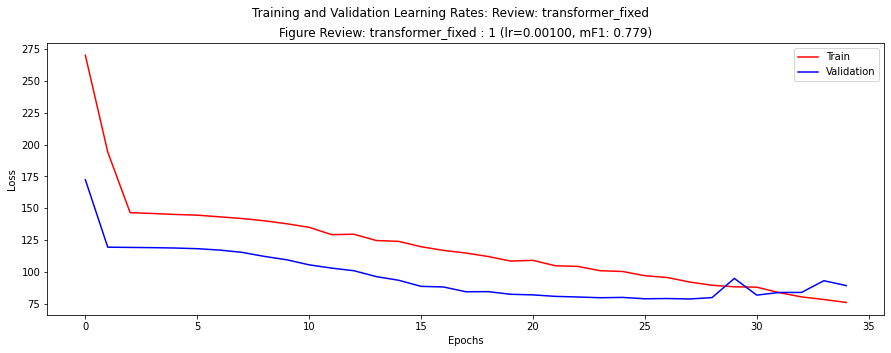

In [6]:
# when comparing several models with the same embeddings with different language
# features (later cells), recreate to get a consistent random seed and clean state
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = set()
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 29s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:53:07:451873
    ended: 06/30/2021 10:53:48:858166
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    min/ave/max loss: 9.86502/81.25967/116.00517
    accuracy: 0.810 (6553/8086)
    micro: F1: 0.810, precision: 0.810, recall: 0.810
    macro: F1: 0.810, precision: 0.816, recall: 0.811
    weighted: F1: 0.810, precision: 0.816, recall: 0.810
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 26/35
    min/ave/max loss: 9.31492/81.19571/130.53035
    accuracy: 0.785 (808/1029)
    micro: F1: 0.785, precision: 0.785, recall: 0.785
    macro: F1: 0.782, precision: 0.808, recall: 0.786
    weighted: F1: 0.781, precision: 0.808, recall: 0.785
  test:
    started: 06/30/2021 10:53:55:927578
    ended: 06/30/2021 10:53:55:974631
    batches: 11
    ave data points per batch/total: 190.8/2099
    c

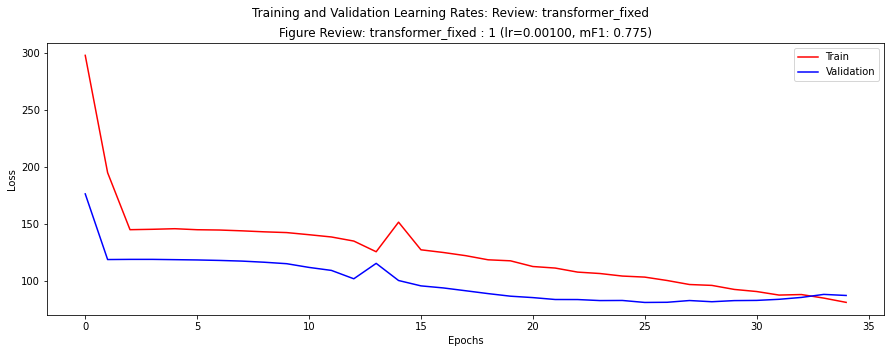

In [7]:
facade = mng.create_facade('transformer-fixed')
facade.epochs = 35
facade.language_attributes = {'enum_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 49s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:54:51:570161
    ended: 06/30/2021 10:55:33:961540
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    min/ave/max loss: 10.33400/79.03842/114.08029
    accuracy: 0.811 (6555/8086)
    micro: F1: 0.811, precision: 0.811, recall: 0.811
    macro: F1: 0.810, precision: 0.817, recall: 0.811
    weighted: F1: 0.810, precision: 0.817, recall: 0.811
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 30/35
    min/ave/max loss: 7.52774/77.06828/130.11067
    accuracy: 0.804 (827/1029)
    micro: F1: 0.804, precision: 0.804, recall: 0.804
    macro: F1: 0.801, precision: 0.824, recall: 0.804
    weighted: F1: 0.801, precision: 0.824, recall: 0.804
  test:
    started: 06/30/2021 10:55:45:720267
    ended: 06/30/2021 10:55:45:767537
    batches: 11
    ave data points per batch/total: 190.8/2099
    

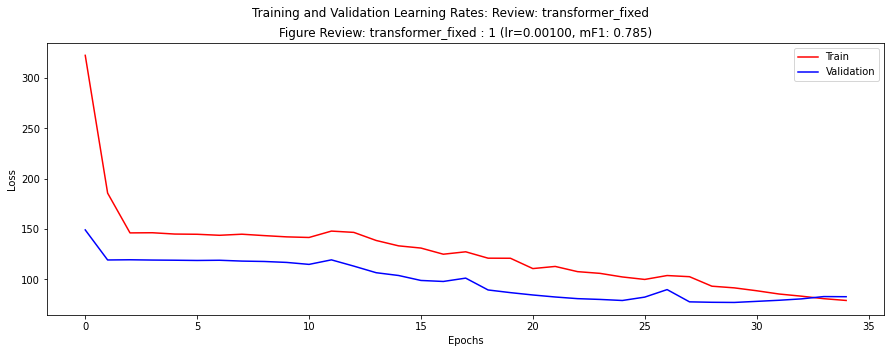

In [8]:
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = {'enum_expander', 'dep_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.facade: clearing
zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 29s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 0.001
tr:

Name: Review: transformer_fixed : 1
Run index: 2
Learning rate: 0.001
  train:
    started: 06/30/2021 10:56:21:738238
    ended: 06/30/2021 10:57:04:181891
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    min/ave/max loss: 7.46217/72.69880/111.59838
    accuracy: 0.834 (6747/8086)
    micro: F1: 0.834, precision: 0.834, recall: 0.834
    macro: F1: 0.834, precision: 0.839, recall: 0.834
    weighted: F1: 0.834, precision: 0.839, recall: 0.834
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 30/35
    min/ave/max loss: 8.38164/77.95274/136.89710
    accuracy: 0.804 (827/1029)
    micro: F1: 0.804, precision: 0.804, recall: 0.804
    macro: F1: 0.801, precision: 0.821, recall: 0.804
    weighted: F1: 0.801, precision: 0.821, recall: 0.804
  test:
    started: 06/30/2021 10:57:11:157564
    ended: 06/30/2021 10:57:11:204780
    batches: 11
    ave data points per batch/total: 190.8/2099
    c

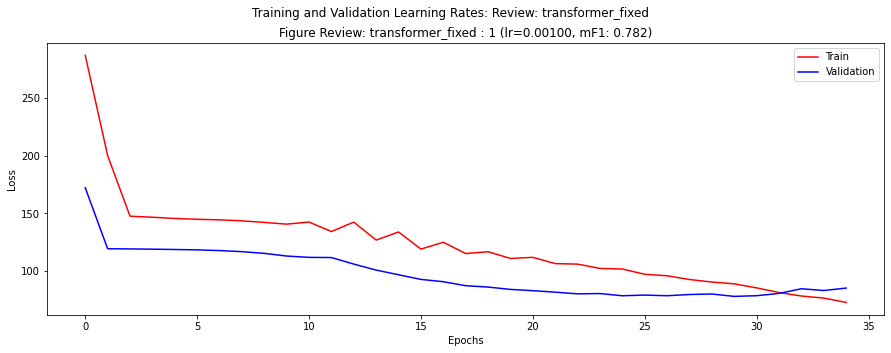

In [9]:
facade = mng.create_facade('transformer-fixed')
facade.language_attributes = {'dep_expander'}
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 0s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 35 epochs using learning rate 2e-06
tr:51.197|va min:62.019|va:64.454|lr:2e-07 /\: 100%|████████████████████████████████████| 35/35 [16

Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 2e-06
  train:
    started: 06/30/2021 10:57:15:673282
    ended: 06/30/2021 11:13:23:462566
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 35/35
    min/ave/max loss: 6.80869/51.19656/77.49220
    accuracy: 0.906 (7329/8086)
    micro: F1: 0.906, precision: 0.906, recall: 0.906
    macro: F1: 0.906, precision: 0.908, recall: 0.906
    weighted: F1: 0.906, precision: 0.908, recall: 0.906
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 29/35
    min/ave/max loss: 8.58550/62.01893/84.36985
    accuracy: 0.856 (881/1029)
    micro: F1: 0.856, precision: 0.856, recall: 0.856
    macro: F1: 0.856, precision: 0.857, recall: 0.856
    weighted: F1: 0.856, precision: 0.857, recall: 0.856
  test:
    started: 06/30/2021 11:13:25:377781
    ended: 06/30/2021 11:13:27:570831
    batches: 11
    ave data points per batch/total: 190.8/2099
   

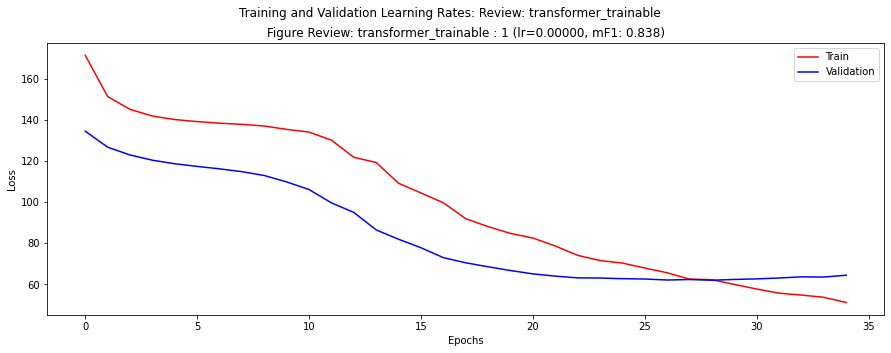

In [10]:
facade = mng.create_facade('transformer-trainable')
mng.run()

zensols.deeplearn.model.facade: creating new executor
zensols.deeplearn.model.executor.status: resetting executor
zensols.deeplearn.model.facade: training...
zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
zensols.deeplearn.model.executor.status: preparing datasets using iteration: gpu
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for train
zensols.deeplearn.model.executor.status: using batch limit: 9223372036854775807 for dev
zensols.deeplearn.model.executor.status: loaded 47 batches in 0s
zensols.deeplearn.model.executor.status: train/test sets: 41 6
zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 25 epochs using learning rate 2e-06
tr:62.004|va min:61.395|va:61.699|lr:2e-06 /\: 100%|████████████████████████████████████| 25/25 [11

Name: Review: transformer_trainable : 1
Run index: 2
Learning rate: 2e-06
  train:
    started: 06/30/2021 11:13:32:021015
    ended: 06/30/2021 11:25:06:195125
    batches: 41
    ave data points per batch/total: 197.2/8086
    converged/epochs: 25/25
    min/ave/max loss: 10.70115/62.00357/88.75334
    accuracy: 0.879 (7111/8086)
    micro: F1: 0.879, precision: 0.879, recall: 0.879
    macro: F1: 0.879, precision: 0.881, recall: 0.879
    weighted: F1: 0.879, precision: 0.881, recall: 0.879
  validation:
    batches: 6
    ave data points per batch/total: 171.5/1029
    converged/epochs: 23/25
    min/ave/max loss: 10.05979/61.39503/77.03369
    accuracy: 0.852 (877/1029)
    micro: F1: 0.852, precision: 0.852, recall: 0.852
    macro: F1: 0.852, precision: 0.854, recall: 0.852
    weighted: F1: 0.852, precision: 0.854, recall: 0.852
  test:
    started: 06/30/2021 11:25:08:048995
    ended: 06/30/2021 11:25:10:238294
    batches: 11
    ave data points per batch/total: 190.8/2099
 

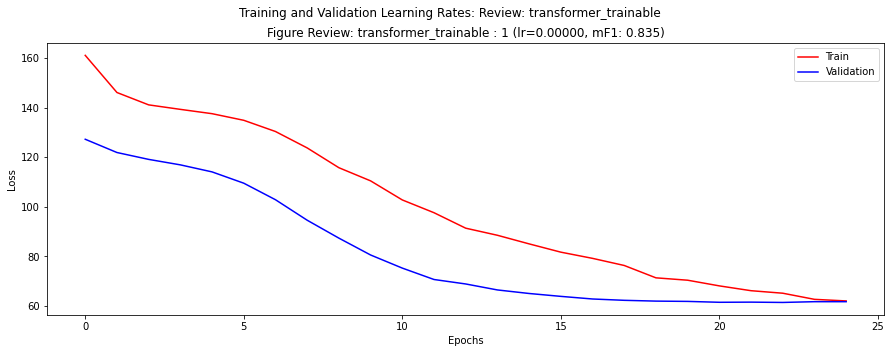

In [11]:
facade = mng.create_facade('transformer-trainable')
facade.model_settings.optimizer_params = {'weight_decay': 0.005}
facade.model_settings.scheduler_params = {'patience': 3}
facade.epochs = 25
mng.run()